#### Accuracy scores
#### Public LB : 	0.9634703196 | Val : 0.9545054299970649 | Private LB : 0.9544120524

##### Ensemble - Simple average of probabilities of test time augmented probabilies from all models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

Load all test time augmented validation data probability files.

In [2]:
# resnet 50 places 365
rn50_plc_val_df = pd.read_csv('resnet50_places_progressive_resizing/val_probs_tta.csv')

# Imagenet resnet 50
rn50_val_df = pd.read_csv('resnet_50_progressive_resizing/val_probs_tta.csv')

# Imagenet resnet 101
rn101_val_df = pd.read_csv('resnet_101/val_probs_tta.csv')

# Imagenet resnext 101 
sernxt_val_df = pd.read_csv('se_resnext101/val_probs_tta.csv')

In [3]:
rn101_val_df.head()

,buildings,forest,glacier,mountain,sea,street,image_name,ground_label
0,9.092325e-04,2.183200e-06,5.706530e-06,7.388077e-07,0.000007,9.990754e-01,16525.jpg,5
1,5.602316e-06,8.353445e-06,9.971453e-01,6.419359e-04,0.002160,3.872834e-05,13651.jpg,2
2,9.999123e-01,5.121162e-07,1.681185e-06,2.146707e-07,0.000002,8.385084e-05,13383.jpg,0
3,9.999747e-01,1.062802e-06,9.028997e-07,4.206092e-08,0.000002,2.139099e-05,11483.jpg,0
4,9.372312e-07,1.565652e-06,7.620794e-05,5.744162e-05,0.999864,4.221686e-07,19306.jpg,4


In [4]:
label_cols = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [5]:
# ground label for validation set
val_ground_labels = rn101_val_df['ground_label'].values

In [6]:
# add all probs 
val_all_sum = rn101_val_df[label_cols].values + rn50_val_df[label_cols].values + rn50_plc_val_df[label_cols].values + sernxt_val_df[label_cols].values

In [7]:
val_pred = val_all_sum.argmax(1)

In [8]:
# Check accuracy for valiadtion set
accuracy_score(y_true=val_ground_labels, y_pred=val_pred)

0.9545054299970649

Great! our validation set accuracy is 95.45 %

Plot Confusion matrix

In [9]:
label_mapper = {0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}

In [10]:
# https://www.kaggle.com/artgor/where-do-the-robots-drive

def plot_confusion_matrix(truth, pred, classes, normalize=False, title=''):
    cm = confusion_matrix(truth, pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix', size=15)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.tight_layout()

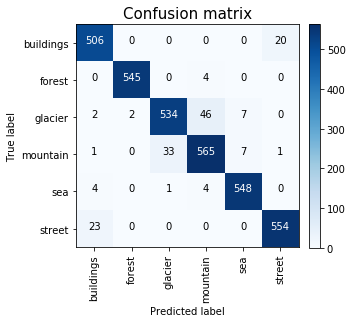

In [11]:
plot_confusion_matrix(pd.Series(val_ground_labels).map(label_mapper), pd.Series(val_pred).map(label_mapper), label_cols)

Load all test time augmented test data probability files.

In [12]:
# resnet 50 places 365
rn50_plc_test_df = pd.read_csv('resnet50_places_progressive_resizing/test_probs_tta.csv')

# Imagenet resnet 50
rn50_test_df = pd.read_csv('resnet_50_progressive_resizing/test_probs_tta.csv')

# Imagenet resnet 101
rn101_test_df = pd.read_csv('resnet_101/test_probs_tta.csv')

# Imagenet resnext 101 
sernxt_test_df = pd.read_csv('se_resnext101/test_probs_tta.csv')

In [13]:
# add probabilities
test_all_sum = rn101_test_df[label_cols].values + rn50_test_df[label_cols].values + rn50_plc_test_df[label_cols].values + sernxt_test_df[label_cols].values

In [14]:
# image file names
test_img_names = rn101_test_df['image_name'].values

In [15]:
# make a submission
pd.DataFrame({'image_name': test_img_names, 'label': test_all_sum.argmax(1)}).to_csv('sub.csv', index=False)